# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint
import requests
from api_keys import weather_api_key
from scipy.stats import linregress


## Generate Cities List

In [2]:
cities = []
locations = []
latitudes = np.random.uniform(-90, 90, size=1500)
longitudes = np.random.uniform(-180, 180, size=1500)
locations = zip(latitudes, longitudes)
for coordinate_pair in locations:
    lat, lon = coordinate_pair
    city = citipy.nearest_city(coordinate_pair[0], coordinate_pair[1]).city_name
    if city not in cities: 
        cities.append(city)
print(len(cities))

586


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
Lat = []
Long = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
cities_found = []


for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial"
    try: 
        weather = requests.get(url).json()
        Max_Temp.append(weather["main"]["temp_max"])
        Lat.append(weather["coord"]["lat"])
        Long.append(weather["coord"]["lon"])
        Humidity.append(weather["main"]["humidity"])
        Cloudiness.append(weather["clouds"]["all"])
        Wind_Speed.append(weather["wind"]["speed"])
        Country.append(weather["sys"]["country"])
        Date.append(weather["dt"])
        cities_found.append(city)
        print(city)
    except:
        print("City weather not found " + city)
cities_df = pd.DataFrame({"City": cities_found, "Lat": Lat, "Lng": Long, "Max Temp": Max_Temp, 
                         "Humidity": Humidity, "Cloudiness": Cloudiness, "Wind Speed": Wind_Speed, 
                         "Country": Country, "Date": Date}) 
cities_df.head(150)


akom
mar del plata
bambous virieux
port alfred
nikolskoye
ushuaia
rocha
thompson
udachnyy
jamestown
avarua
lagoa
manado
quatre cocos
bograd
kiama
rikitea
sault sainte marie
City weather not found attawapiskat
kodiak
empangeni
City weather not found mutsamudu
barrow
akyab
viedma
kaitangata
punta arenas
kisangani
longyearbyen
khatanga
cape town
cidreira
bengkulu
omis
victoria
airai
hobart
sibolga
vaini
cazanesti
yanam
hilo
norman wells
albany
vestmannaeyjar
saint george
remanso
babu
daru
castro
port elizabeth
City weather not found illoqqortoormiut
kristianstad
keffi
hithadhoo
makokou
hermanus
yellowknife
dingle
ixtapa
tuatapere
comodoro rivadavia
cabo san lucas
don sak
kapaa
kruisfontein
trinidad
pangnirtung
tadine
harrisonville
jiuquan
City weather not found taolanaro
codrington
lebu
qaanaaq
ponta do sol
ikwiriri
san patricio
new norfolk
City weather not found meyungs
mouila
axim
butaritari
havre-saint-pierre
mackenzie
City weather not found tumannyy
terracina
dikson
richards bay
paita

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,akom,2.67,12.71,66.69,99,100,4.27,CM,1601166479
1,mar del plata,-38.00,-57.56,54.00,100,90,9.17,AR,1601166415
2,bambous virieux,-20.34,57.76,68.00,88,75,3.36,MU,1601166480
3,port alfred,-33.59,26.89,52.95,63,0,15.99,ZA,1601166210
4,nikolskoye,59.70,30.79,55.00,87,10,8.95,RU,1601166480
...,...,...,...,...,...,...,...,...,...
145,yertsevo,60.80,40.09,47.07,94,19,4.94,RU,1601166511
146,mao,39.89,4.27,69.80,56,2,21.92,ES,1601166511
147,bacolod,10.67,122.95,83.14,75,80,1.05,PH,1601166275
148,ambilobe,-13.20,49.05,66.24,83,0,3.94,MG,1601166512


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#saving City DataFrame as CSV file
cities_df.to_csv('output_data\city_data.csv', index = False)

file_path = os.path.join("output_data", "city_data.csv")
df = pd.read_csv(file_path)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,akom,2.67,12.71,66.69,99,100,4.27,CM,1601166479
1,mar del plata,-38.00,-57.56,54.00,100,90,9.17,AR,1601166415
2,bambous virieux,-20.34,57.76,68.00,88,75,3.36,MU,1601166480
3,port alfred,-33.59,26.89,52.95,63,0,15.99,ZA,1601166210
4,nikolskoye,59.70,30.79,55.00,87,10,8.95,RU,1601166480


In [5]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.560237,16.885446,64.209089,73.814208,49.404372,7.915282,1.601167e+09
std,33.088939,91.202846,15.530173,19.486147,38.177606,5.111894,9.504559e+01
min,-54.800000,-175.200000,12.940000,7.000000,0.000000,0.270000,1.601166e+09
25%,-7.840000,-63.600000,52.000000,65.000000,7.000000,4.070000,1.601166e+09
50%,22.080000,18.740000,66.990000,78.000000,43.000000,6.930000,1.601167e+09
75%,48.400000,101.500000,77.000000,88.000000,90.000000,10.650000,1.601167e+09
max,78.220000,178.420000,99.000000,100.000000,100.000000,28.010000,1.601167e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#nothing greater than 100% as shown by max humidity value

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

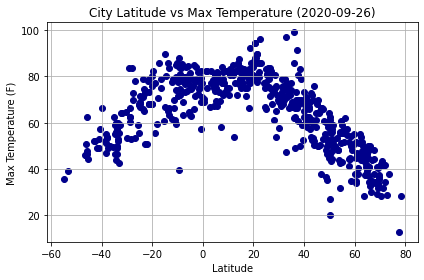

In [7]:
    from datetime import date
    lat = cities_df["Lat"]
    max_temp = cities_df["Max Temp"]
    plt.scatter(lat, max_temp, color='DarkBlue')
    plt.title(f"City Latitude vs Max Temperature ({date.today()})")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (F)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("output_data/CityLatVMaxtemp")
    plt.show()

## Latitude vs. Humidity Plot

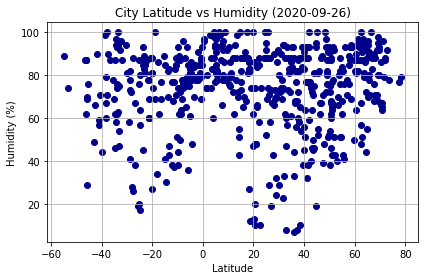

In [8]:
    lat = cities_df["Lat"]
    hum = cities_df["Humidity"]
    plt.scatter(lat, hum, color='DarkBlue')
    plt.title(f"City Latitude vs Humidity ({date.today()})")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("output_data/CityLatVHumidity")
    plt.show()

## Latitude vs. Cloudiness Plot

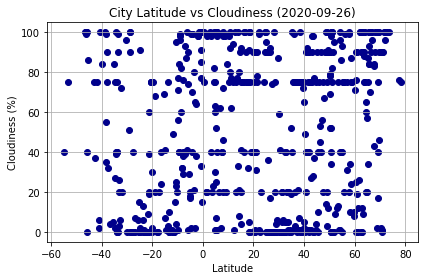

In [9]:
    lat = cities_df["Lat"]
    cloud = cities_df["Cloudiness"]
    plt.scatter(lat, cloud, color='DarkBlue')
    plt.title(f"City Latitude vs Cloudiness ({date.today()})")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("output_data/CityLatVCloudiness")
    plt.show()

## Latitude vs. Wind Speed Plot

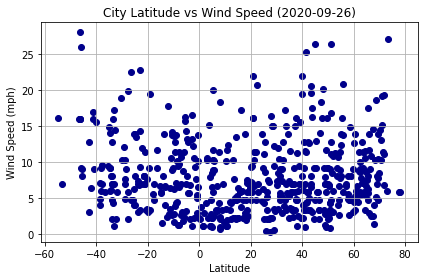

In [10]:
    lat = cities_df["Lat"]
    wspeed = cities_df["Wind Speed"]
    plt.scatter(lat, wspeed, color='DarkBlue')
    plt.title(f"City Latitude vs Wind Speed ({date.today()})")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (mph)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("output_data/CityLatVWindSpeed")
    plt.show()

## Linear Regression

The measure of the proportion of variability in the data, r^2 is: 0.7038890494761562


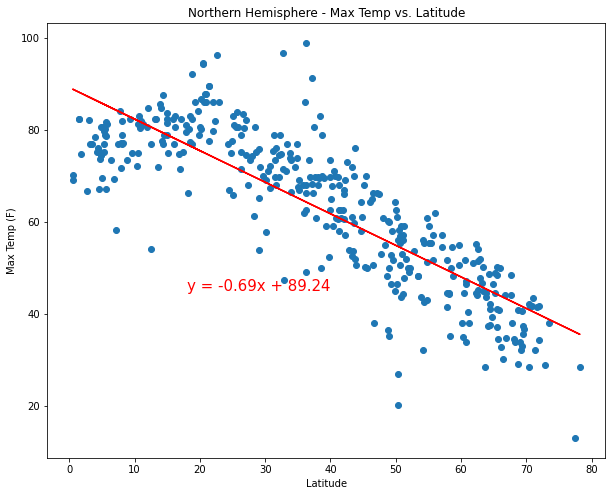

In [11]:
#Seperate Northern and Southern Hemispheres
north_hem_df = cities_df.loc[(cities_df["Lat"]>0)]
south_hem_df = cities_df.loc[(cities_df["Lat"]<0)]
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#name x and y data for slope
x_values = north_hem_df['Lat']
y_values = north_hem_df['Max Temp']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (18,45), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/NHmxtempVlat.png")
plt.show()

The measure of the proportion of variability in the data, r^2 is: 0.5508541208594598


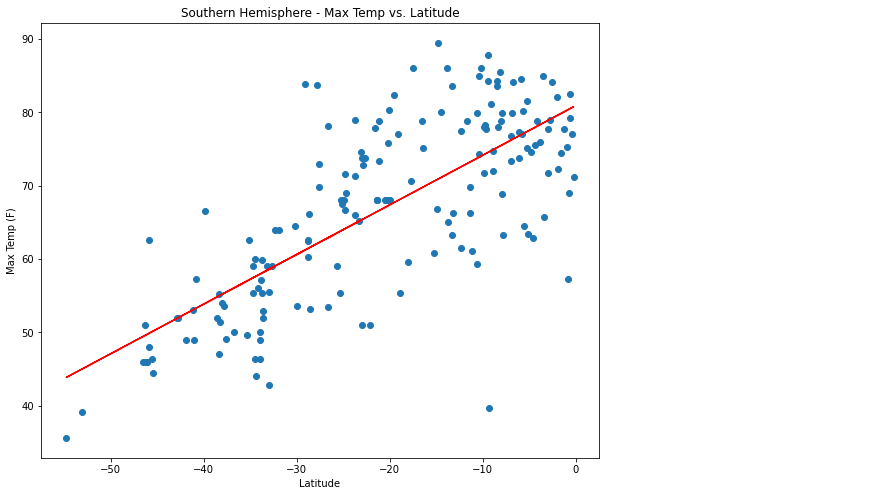

In [12]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#name x and y data for slope
x_values = south_hem_df['Lat']
y_values = south_hem_df['Max Temp']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (18,45), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/SHmxtempVlat.png")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The measure of the proportion of variability in the data, r^2 is: 5.559576872545659e-05


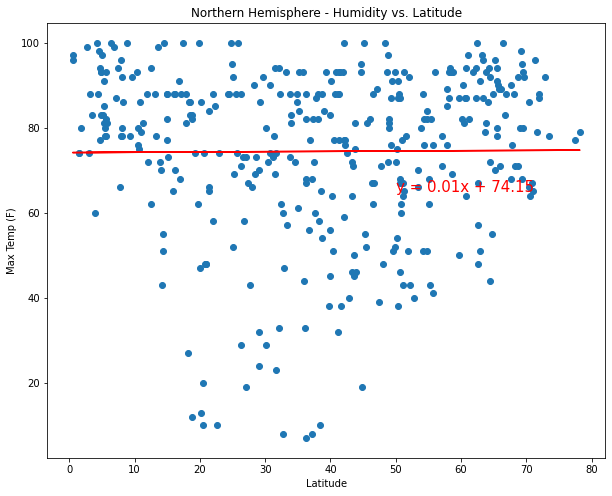

In [13]:
#Northern Hemisphere - Humidity vs. Latitude Linear Regression
#name x and y data for slope
x_values = north_hem_df['Lat']
y_values = north_hem_df['Humidity']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (50,65), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/NHhumidVlat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The measure of the proportion of variability in the data, r^2 is: 0.002383283291730476


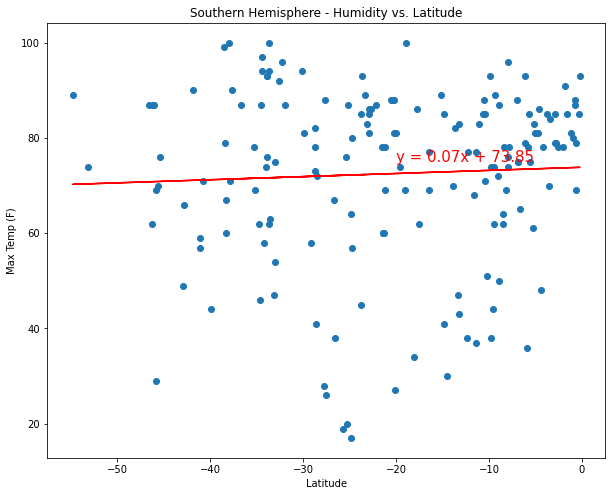

In [14]:
#Southern Hemisphere - Humidity vs. Latitude Linear Regression
#name x and y data for slope
x_values = south_hem_df['Lat']
y_values = south_hem_df['Humidity']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (-20,75), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/SHhumidVlat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The measure of the proportion of variability in the data, r^2 is: 0.005739835896437981


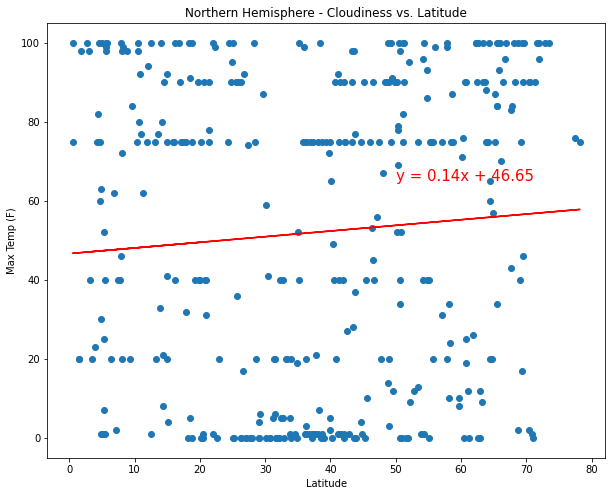

In [15]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
#name x and y data for slope
x_values = north_hem_df['Lat']
y_values = north_hem_df['Cloudiness']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (50,65), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/NHcloudVlat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The measure of the proportion of variability in the data, r^2 is: 4.974519155201529e-06


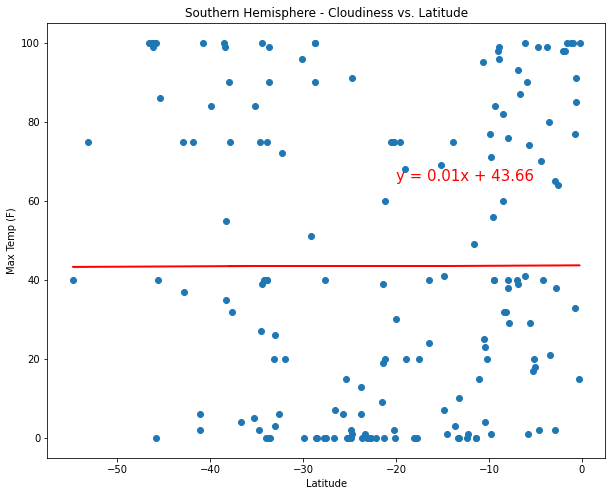

In [16]:
#Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
#name x and y data for slope
#name x and y data for slope
x_values = south_hem_df['Lat']
y_values = south_hem_df['Cloudiness']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x (Weight (g))
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (-20, 65), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/SHcloudVlat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The measure of the proportion of variability in the data, r^2 is: 0.04275021533274159


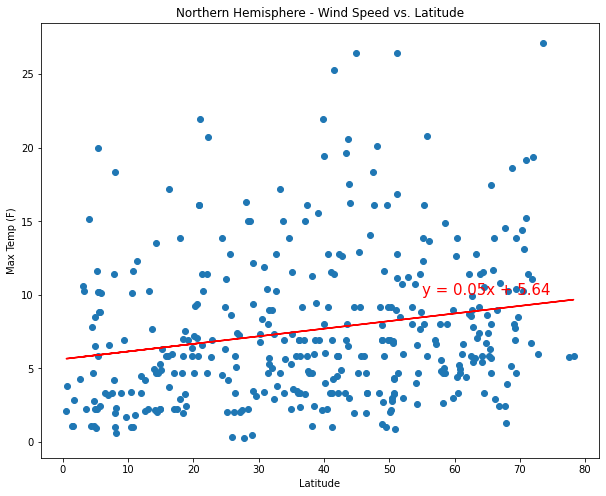

In [17]:
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
#name x and y data for slope
x_values = north_hem_df['Lat']
y_values = north_hem_df['Wind Speed']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (55, 10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/NHwdsppVlat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The measure of the proportion of variability in the data, r^2 is: 0.0622632997861007


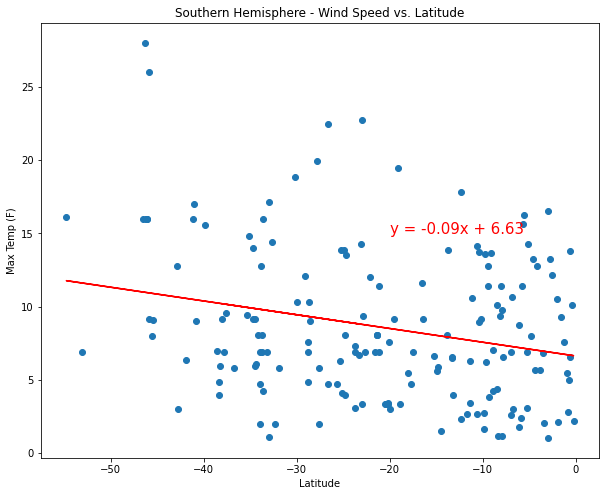

In [18]:
#Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
#name x and y data for slope
x_values = south_hem_df['Lat']
y_values = south_hem_df['Wind Speed']
#run regression and store returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate the predictions for each value of x 
regression_values = x_values * slope + intercept
# store the string version of said linear equation, to be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#format and show plot with best fit line and slope showing
plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values,regression_values,"red")
plt.annotate(line_eq, (-20, 15), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The measure of the proportion of variability in the data, r^2 is: {rvalue**2}")
plt.savefig("output_data/SHwdsppVlat.png")
plt.show()